In [1]:
!pip install imbalanced_learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
df_diag = pd.read_csv("sampling_healthkathon2022_diagnosa\sampling_healthkathon2022_diagnosa.csv")
df_proc = pd.read_csv("sampling_healthkathon2022_procedure\sampling_healthkathon2022_procedure.csv")
df = pd.read_csv("sampling_healtkathon2022\sampling_healtkathon2022.csv")

In [4]:
pd.options.display.max_columns = None

In [5]:
df_proc

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
12202866,11426915,93.57
12202867,11426927,89.52
12202868,11426927,96.55
12202869,11426927,87.39


In [6]:
df_diag[:5]

,id,diag,levelid
0,6,O06.9,1
1,57,J02.9,1
2,91,R10.1,1
3,109,R18,1
4,111,N81.3,1


In [7]:
df[:10]

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,NaN,R23.1,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
5,51010,663,8,SD,50,P,1.0,2018-12-26T17:00:00.000Z,2018-12-26T17:00:00.000Z,2,IGD,D61,155000.0,2.0,Q-5-33-0,3,None,None,None,None,None,0
6,49388,663,8,SD,50,P,1.0,2019-01-24T17:00:00.000Z,2019-01-24T17:00:00.000Z,2,IGD,D64.9,155000.0,2.0,Q-5-33-0,3,None,None,None,None,None,0
7,1025249,663,17,A,49,P,1.0,2018-10-06T17:00:00.000Z,2018-10-14T17:00:00.000Z,1,NaN,K28.0,8309700.0,1.0,D-4-13-II,1,None,None,None,None,None,0
8,143197,736,17,KI,46,P,1.0,2020-04-19T17:00:00.000Z,2020-04-19T17:00:00.000Z,2,IGD,K30,186800.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
9,176799,739,19,C,61,L,1.0,2020-09-28T17:00:00.000Z,2020-10-01T17:00:00.000Z,1,NaN,M06.0,2932600.0,1.0,M-4-18-I,1,None,None,None,None,None,0


In [8]:
print(df.shape)
print(df_diag.shape)
print(df_proc.shape)


(11401882, 22)
(17308536, 3)
(12202871, 2)


In [9]:
 df_proc.describe()

,id
count,1.220287e+07
mean,6.296677e+06
std,3.401134e+06
min,1.000000e+00
25%,3.360037e+06
50%,6.553008e+06
75%,9.481442e+06
max,1.142695e+07


<AxesSubplot:>

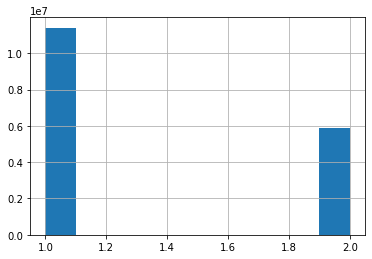

In [10]:
df_diag['levelid'].hist()

#### df_diag.describe()

In [11]:
 df.describe()

,id,id_peserta,dati2,usia,pisat,jenispel,biaya,jenispulang,kelasrawat,label
count,1.140188e+07,1.140188e+07,1.140188e+07,1.140188e+07,1.140169e+07,1.140188e+07,1.134407e+07,1.140184e+07,1.140188e+07,1.140188e+07
mean,5.712720e+06,4.199294e+06,1.825299e+02,3.705690e+01,2.498204e+00,1.645544e+00,2.146849e+06,1.094596e+00,2.784695e+00,1.375992e-02
std,3.298535e+06,2.436249e+06,1.061352e+02,2.292188e+01,1.390863e+00,4.783482e-01,5.207577e+06,5.131554e-01,5.511473e-01,1.164929e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.855432e+06,2.119461e+06,1.140000e+02,1.800000e+01,1.000000e+00,1.000000e+00,1.904000e+05,1.000000e+00,3.000000e+00,0.000000e+00
50%,5.712226e+06,4.161532e+06,1.590000e+02,3.900000e+01,3.000000e+00,2.000000e+00,2.872000e+05,1.000000e+00,3.000000e+00,0.000000e+00
75%,8.568902e+06,6.292149e+06,2.280000e+02,5.600000e+01,4.000000e+00,2.000000e+00,2.996000e+06,1.000000e+00,3.000000e+00,0.000000e+00
max,1.142696e+07,8.527919e+06,5.280000e+02,1.100000e+02,5.000000e+00,2.000000e+00,4.016966e+08,5.000000e+00,3.000000e+00,1.000000e+00


<AxesSubplot:>

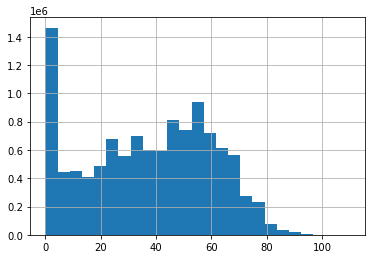

In [12]:
df['usia'].hist(bins=25)

In [13]:
df['biaya'].median()

287200.0

In [14]:
counts = df.nunique()

In [15]:


to_del = [df.columns[i] for i,v in enumerate(counts[:-1]) if (float(v)/df.shape[0]*100) < 1]
to_del

['dati2',
 'typefaskes',
 'usia',
 'jenkel',
 'pisat',
 'tgldatang',
 'tglpulang',
 'jenispel',
 'politujuan',
 'diagfktp',
 'biaya',
 'jenispulang',
 'cbg',
 'kelasrawat',
 'kdsa',
 'kdsp',
 'kdsr',
 'kdsi',
 'kdsd']

In [16]:
df.columns

Index(['id', 'id_peserta', 'dati2', 'typefaskes', 'usia', 'jenkel', 'pisat',
       'tgldatang', 'tglpulang', 'jenispel', 'politujuan', 'diagfktp', 'biaya',
       'jenispulang', 'cbg', 'kelasrawat', 'kdsa', 'kdsp', 'kdsr', 'kdsi',
       'kdsd', 'label'],
      dtype='object')

In [17]:
categorical = df.dtypes[df.dtypes == object]

In [18]:
categorical.keys()

Index(['typefaskes', 'jenkel', 'tgldatang', 'tglpulang', 'politujuan',
       'diagfktp', 'cbg', 'kdsa', 'kdsp', 'kdsr', 'kdsi', 'kdsd'],
      dtype='object')

In [19]:
df.drop(columns=['tgldatang','tglpulang','kdsa', 'kdsp', 'kdsr', 'kdsi', 'kdsd','politujuan'],inplace=True)

In [20]:
df

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,jenispel,diagfktp,biaya,jenispulang,cbg,kelasrawat,label
0,165666,486,17,KL,48,P,1.0,2,L02.8,184300.0,1.0,Q-5-42-0,3,0
1,1010828,520,17,A,63,L,1.0,1,R23.1,10628400.0,1.0,D-4-13-III,1,0
2,166042,523,17,KL,53,P,1.0,2,E10.5,187300.0,1.0,Q-5-44-0,3,0
3,168937,549,17,KL,54,P,1.0,2,H54.2,187300.0,1.0,Q-5-44-0,3,0
4,1005899,549,17,A,53,P,1.0,2,M54.5,381600.0,1.0,Q-5-44-0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,B,0,P,4.0,1,Z71.8,3645100.0,1.0,P-8-17-I,3,0
11401878,11053870,8527709,233,A,0,P,4.0,1,P59.9,12273200.0,1.0,P-8-13-II,2,0
11401879,7461049,8527751,118,B,0,L,4.0,1,P24.8,4099000.0,1.0,P-8-08-I,3,0
11401880,1075162,8527853,101,SC,0,L,5.0,1,P03,3992400.0,1.0,P-8-08-I,3,0


In [21]:
categorical = df.dtypes[df.dtypes == object]
categorical.keys()

Index(['typefaskes', 'jenkel', 'diagfktp', 'cbg'], dtype='object')

In [22]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer


In [23]:

# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [24]:
dataset= df.values
X = dataset[:,:-1]
y = dataset[:,-1]

oe = OrdinalEncoder()


# X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# # prepare output data
# y_train_enc, y_test_enc = prepare_targets(y_train, y_test)


In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
categorical = ['typefaskes', 'jenkel', 'diagfktp', 'cbg']
for col in categorical:
    df[col] = lb.fit_transform(df[col])
df

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,jenispel,diagfktp,biaya,jenispulang,cbg,kelasrawat,label
0,165666,486,17,16,48,1,1.0,2,5472,184300.0,1.0,825,3,0
1,1010828,520,17,0,63,0,1.0,1,11656,10628400.0,1.0,106,1,0
2,166042,523,17,16,53,1,1.0,2,2210,187300.0,1.0,827,3,0
3,168937,549,17,16,54,1,1.0,2,3877,187300.0,1.0,827,3,0
4,1005899,549,17,0,53,1,1.0,2,7637,381600.0,1.0,827,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,1,0,1,4.0,1,15143,3645100.0,1.0,783,3,0
11401878,11053870,8527709,233,0,0,1,4.0,1,10671,12273200.0,1.0,772,2,0
11401879,7461049,8527751,118,1,0,0,4.0,1,10540,4099000.0,1.0,762,3,0
11401880,1075162,8527853,101,24,0,0,5.0,1,10421,3992400.0,1.0,762,3,0


In [31]:
df.isnull().sum()

id             0
id_peserta     0
dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
jenispel       0
diagfktp       0
biaya          0
jenispulang    0
kelasrawat     0
label          0
dtype: int64

In [32]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
df.pisat = imp_mean.fit_transform(df[['pisat']])
df.biaya = imp_mean.fit_transform(df[['biaya']])
df.jenispulang = imp_mean.fit_transform(df[['jenispulang']])
df

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,jenispel,diagfktp,biaya,jenispulang,kelasrawat,label
0,165666,486,17,16,48,1,1.0,2,5472,184300.0,1.0,3,0
1,1010828,520,17,0,63,0,1.0,1,11656,10628400.0,1.0,1,0
2,166042,523,17,16,53,1,1.0,2,2210,187300.0,1.0,3,0
3,168937,549,17,16,54,1,1.0,2,3877,187300.0,1.0,3,0
4,1005899,549,17,0,53,1,1.0,2,7637,381600.0,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,1,0,1,4.0,1,15143,3645100.0,1.0,3,0
11401878,11053870,8527709,233,0,0,1,4.0,1,10671,12273200.0,1.0,2,0
11401879,7461049,8527751,118,1,0,0,4.0,1,10540,4099000.0,1.0,3,0
11401880,1075162,8527853,101,24,0,0,5.0,1,10421,3992400.0,1.0,3,0


In [28]:
print(y.tolist().count(0),y.tolist().count(1))

11244993 156889


In [34]:
df.drop(columns=['id','id_peserta'],inplace=True)

In [35]:
df

,dati2,typefaskes,usia,jenkel,pisat,jenispel,diagfktp,biaya,jenispulang,kelasrawat,label
0,17,16,48,1,1.0,2,5472,184300.0,1.0,3,0
1,17,0,63,0,1.0,1,11656,10628400.0,1.0,1,0
2,17,16,53,1,1.0,2,2210,187300.0,1.0,3,0
3,17,16,54,1,1.0,2,3877,187300.0,1.0,3,0
4,17,0,53,1,1.0,2,7637,381600.0,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
11401877,301,1,0,1,4.0,1,15143,3645100.0,1.0,3,0
11401878,233,0,0,1,4.0,1,10671,12273200.0,1.0,2,0
11401879,118,1,0,0,4.0,1,10540,4099000.0,1.0,3,0
11401880,101,24,0,0,5.0,1,10421,3992400.0,1.0,3,0


In [43]:
dataset= df.values
X_ = dataset[:,:-1]
y_ = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_,y_, test_size=0.999, random_state=1, stratify=y_)

In [44]:
smoter =  SMOTE(random_state=0)
X_train,y_train=smoter.fit_resample(X_train, y_train)
print(X_train.shape,y_train.shape)

(22488, 10) (22488,)


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
model = LogisticRegression(solver='liblinear', random_state=0)


In [40]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [41]:
y_hat = model.predict(X_test)

In [43]:
y_hat

array([1., 1., 1., ..., 0., 1., 1.])

In [42]:
s

NameError: name 's' is not defined

In [46]:
confusion_matrix(y_test,y_hat).ravel()

array([1830850, 1542648, 1477854, 1895644], dtype=int64)

In [30]:
def evaluate(tn,fp,fn,tp):
    sensitivity = tp/(tp+fn)
    precision = (tp/(tp+fp))
    neg_pred_val = (tn/(tn+fn))
    specificity = (tn/(tn+fp))
    accuracy = ((tp+tn)/(tp+tn+fp+fn))
    return sensitivity,precision,neg_pred_val,specificity,accuracy

In [37]:
evaluate(*confusion_matrix(y_test,y_hat).ravel())

NameError: name 'y_hat' is not defined

In [53]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

clf2 = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=2)
clf3 = AdaBoostClassifier()
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)

In [54]:
y_hat_RF = clf2.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_RF).ravel())

(0.25641221958502414,
 0.028845822566752798,
 0.9883424303068005,
 0.879558284594039,
 0.8709838504625046)

In [55]:
y_hat_AB = clf3.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_AB).ravel())

(0.28011510093663067,
 0.07261110890591302,
 0.9895391637691201,
 0.9500853188014081,
 0.9408665885136897)

In [50]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [51]:
y_hat_DC = clf.predict(X_test)
confusion_matrix(y_test,y_hat_DC)

array([[11046078,   187671],
       [  112706,    44026]], dtype=int64)

In [52]:
evaluate(*confusion_matrix(y_test,y_hat_DC).ravel())

(0.2808998800500217,
 0.19001540805448494,
 0.9898997955332768,
 0.9832940009608546,
 0.9736291206666339)

In [41]:
evaluate(*confusion_matrix(y_test,y_hat_DC).ravel())

(0.19805192735524915,
 0.23239931781461312,
 0.9888343483576097,
 0.990873337282745,
 0.9799641988214451)

In [42]:
y_hat_DC_ = clf.predict(X_test_)
evaluate(*confusion_matrix(y_test_,y_hat_DC_).ravel())

NameError: name 'X_test_' is not defined

In [56]:
clf.score(X_test_,y_test_)

0.9875438706763356

In [54]:
import pickle
filename = 'model_Dtree.sav'
pickle.dump(model, open(filename, 'wb'))

In [31]:
from sklearn import svm

clf1 = svm.SVC()
clf1.fit(X_train, y_train)
clf1.predict(X_test)

array([1., 1., 0., ..., 1., 1., 1.])

In [33]:
y_hat_svm = clf1.predict(X_test)

NameError: name 'confusion_matrix' is not defined

In [35]:
confusion_matrix(y_test,y_hat_svm)

array([[6645309, 4598560],
       [  84085,   72788]], dtype=int64)

In [38]:
evaluate(*confusion_matrix(y_test,y_hat_svm).ravel())

(0.46399316644674354,
 0.015581797802261788,
 0.9875048184130696,
 0.5910162240417423,
 0.5892684002497381)

In [43]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
    #### jawab disini ####
    fs = SelectKBest(score_func=chi2,k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
# X, y = load_dataset('sampling_healtkathon2022\sampling_healtkathon2022.csv')
# split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

ValueError: Found unknown categories [2.0, 4.0, 11.0, 15.0, 16.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 28.0, 29.0, 30.0, 31.0, 33.0, 34.0, 37.0, 40.0, 43.0, 44.0, 46.0, 48.0, 57.0, 58.0, 59.0, 61.0, 63.0, 65.0, 66.0, 68.0, 71.0, 78.0, 80.0, 83.0, 85.0, 87.0, 88.0, 96.0, 98.0, 99.0, 101.0, 104.0, 105.0, 109.0, 147.0, 155.0, 156.0, 166.0, 176.0, 200.0, 211.0, 218.0, 219.0, 224.0, 230.0, 235.0, 239.0, 241.0, 242.0, 245.0, 246.0, 247.0, 248.0, 252.0, 253.0, 255.0, 256.0, 259.0, 263.0, 264.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 277.0, 278.0, 284.0, 285.0, 291.0, 295.0, 298.0, 299.0, 311.0, 312.0, 318.0, 321.0, 325.0, 331.0, 332.0, 335.0, 339.0, 343.0, 349.0, 355.0, 357.0, 358.0, 359.0, 360.0, 361.0, 362.0, 365.0, 366.0, 368.0, 372.0, 375.0, 376.0, 377.0, 378.0, 379.0, 382.0, 386.0, 388.0, 389.0, 390.0, 391.0, 392.0, 393.0, 394.0, 395.0, 396.0, 397.0, 400.0, 401.0, 402.0, 404.0, 406.0, 407.0, 408.0, 409.0, 410.0, 411.0, 413.0, 414.0, 418.0, 419.0, 421.0, 422.0, 424.0, 429.0, 438.0, 440.0, 443.0, 444.0, 445.0, 446.0, 447.0, 448.0, 449.0, 451.0, 452.0, 453.0, 456.0, 457.0, 458.0, 460.0, 461.0, 463.0, 464.0, 465.0, 466.0, 467.0, 468.0, 469.0, 474.0, 475.0, 479.0, 483.0, 486.0, 487.0, 488.0, 489.0, 490.0, 493.0, 494.0, 495.0, 497.0, 501.0, 502.0, 503.0, 508.0, 509.0, 510.0, 512.0, 515.0, 516.0, 517.0, 518.0, 519.0, 520.0, 522.0, 524.0, 526.0, 527.0, 528.0] in column 0 during transform

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf4 = QuadraticDiscriminantAnalysis()

clf4 = clf4.fit(X_train, y_train)


C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [66]:
y_hat_QD = clf4.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_QD).ravel())

C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:912: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:912: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\jmspa\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:915: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\jmspa\AppData\Local\Temp\ipykernel_21276\3484246914.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  neg_pred_val = (tn/(tn+fn))


(1.0, 0.013759893873574194, nan, 0.0, 0.013759893873574194)

In [49]:
clf5 = GaussianNB()
clf5 = clf5.fit(X_train, y_train)
y_hat_G = clf5.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_G).ravel())

(0.8868833422657785,
 0.014382069112938295,
 0.989725058824893,
 0.1520179060436547,
 0.16212958873290778)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [69]:

clf8=SVC(kernel="linear", C=0.025)
clf9=SVC(gamma=2, C=1)
clf10=GaussianProcessClassifier(1.0 * RBF(1.0))


clf8 = clf8.fit(X_train, y_train)
clf9 = clf9.fit(X_train, y_train)
clf10 = clf10.fit(X_train, y_train)

In [47]:
clf6=MLPClassifier(alpha=1, max_iter=1000)
clf6 = clf6.fit(X_train, y_train)
y_hat_6 = clf6.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_6).ravel())

(0.027939412500319016,
 0.9340870307167235,
 0.9866190260089921,
 0.9999724935994209,
 0.9865974053246742)

In [48]:
clf7=KNeighborsClassifier(2)
clf7 = clf7.fit(X_train, y_train)
y_hat_7 = clf7.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_7).ravel())

(0.4279789704718883,
 0.08823069041126883,
 0.9915661231597753,
 0.9382949538929524,
 0.9312730515945727)

In [ ]:
y_hat_8 = clf8.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_8).ravel())

In [ ]:
y_hat_9 = clf9.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_9).ravel())

In [41]:
clf10=GaussianProcessClassifier(1.0 * RBF(1.0))
clf10 = clf10.fit(X_train, y_train)
y_hat_10 = clf10.predict(X_test)
evaluate(*confusion_matrix(y_test,y_hat_10).ravel())

MemoryError: Unable to allocate 377. GiB for an array with shape (224898, 224898) and data type float64